In [1]:
import pandas as pd

# 1. 데이터 로드
course_list_df = pd.read_excel('교양교과목록_최종.xlsx')

# 2. STRONG 유형별 키워드 정의 (이전 대화의 기준 적용)
strong_keywords = {
    'R (현장형)': ['골프', '테니스', '댄스', '호신술', '건강', '재해', '안전', '환경', '생태',
                '자동차', '드론', '메이커', '3D', '기계', '스포츠', '신체', '농업', 
                '스킨스쿠버', '태권도', '탁구', '축구', '풋살'], # 미분류된 스포츠 키워드 추가
    'I (탐구형)': ['4차산업', 'AI', '인공지능', '데이터', '통계', '수학', '뇌과학', '역사',
                '철학', '사상', '비판적사고', '인문', '지역학', '과학', '탐구', '논리',
                '물리', '화학', '생물', '이해', '삼국지', '생각지능', '문제해결'], # 추가 키워드
    'A (예술형)': ['디자인', '미술', '음악', '영화', '연극', '사진', '글쓰기', '문학',
                '스토리', '한국어', '영어', '중국어', '일본어', '회화', '예술', '창작',
                '언어', '표현', '드로잉', '영상', '문화', '한자', '오페라'], # 오페라, 한자 추가
    'S (사회형)': ['봉사', '멘토링', '인권', '복지', '나눔', '심리', '교육', '코칭',
                '부모', '기독교', '채플', '행복', '성경', '상담', 'AHA'],
    'E (진취형)': ['창업', '스타트업', '경영', '마케팅', '기획', '리더십', '법', '토론',
                '스피치', '발표', '협상', '권력', '비즈니스', '경제', 'CEO', '리더', '진로', 
                '행정', '범죄'], # 행정, 범죄 추가
    'C (사무형)': ['엑셀', 'PPT', '문서', '회계', '세무', '재테크', '투자', '금융',
                '자산', '실무', '컴퓨터활용', '정보', '스마트', '부동산', '원가'] # 부동산, 원가 추가
}

# 3. 분류 함수 정의
def classify_course_strong(course_name):
    if pd.isna(course_name):
        return 'Unclassified'
    
    # 우선순위가 필요한 경우 로직 추가 가능 (현재는 발견 즉시 반환)
    for type_name, keywords in strong_keywords.items():
        for keyword in keywords:
            if keyword in str(course_name):
                return type_name
    return 'Unclassified'

# 4. 분류 실행
course_list_df['STRONG_Type'] = course_list_df['교과목명'].apply(classify_course_strong)

# 5. 결과 확인
print(course_list_df[['교과목명', 'STRONG_Type']].head(10))
print(course_list_df['STRONG_Type'].value_counts())

         교과목명 STRONG_Type
0     자연재해의이해     R (현장형)
1      사회봉사활동     S (사회형)
2    세계의민족과문화     A (예술형)
3        교양음악     A (예술형)
4      자동차와생활     R (현장형)
5    생활속의정보기술     C (사무형)
6        성과건강     R (현장형)
7  문화콘텐츠와뉴미디어     A (예술형)
8       발상과표현     A (예술형)
9       한자와한문     A (예술형)
STRONG_Type
I (탐구형)         84
A (예술형)         83
Unclassified    66
E (진취형)         44
R (현장형)         29
C (사무형)         12
S (사회형)         10
Name: count, dtype: int64


In [2]:
course_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   학년도          328 non-null    int64  
 1   학기           328 non-null    int64  
 2   교과목명         328 non-null    object 
 3   교과목코드        328 non-null    int64  
 4   분반           328 non-null    int64  
 5   단과대학코드       328 non-null    object 
 6   학과코드         328 non-null    int64  
 7   전공코드         328 non-null    int64  
 8   단과대학명        328 non-null    object 
 9   학과명          328 non-null    object 
 10  전공명          0 non-null      float64
 11  교과설명         311 non-null    object 
 12  이수구분         328 non-null    object 
 13  수강기준학년       328 non-null    int64  
 14  수강기준학기       328 non-null    int64  
 15  STRONG_Type  328 non-null    object 
dtypes: float64(1), int64(8), object(7)
memory usage: 41.1+ KB


미분류된 66개를 어떻게 처리할 건가

In [3]:
# 1. 미분류된 과목만 따로 추출해서 눈으로 확인
unclassified_courses = course_list_df[course_list_df['STRONG_Type'] == 'Unclassified']['교과목명'].unique()

print(f"--- 미분류 과목 리스트 ({len(unclassified_courses)}개) ---")
print(unclassified_courses)

# ------------------------------------------------------------------
# [솔루션 코드] 위 리스트를 보고 아래 딕셔너리에 채워 넣으세요.
# ------------------------------------------------------------------

# 1. 추가 키워드 (패턴이 보이는 경우)
additional_keywords = {
    'R (현장형)': ['레저', '무도', '구기', '응급'],
    'I (탐구형)': ['이해', '탐색', '세계', '지리'],
    'A (예술형)': ['독서', '명작', '감상'],
    'S (사회형)': ['공동체', '윤리'],
    'E (진취형)': ['직업', '성공'],
    'C (사무형)': ['생활', '실용']
}

# 2. 1:1 수동 매핑 (특이한 과목명 처리)
# 예시: '다시만나는삼국지'는 키워드로 잡기 어려우니 직접 지정
manual_mapping = {
    '다시만나는삼국지': 'I (탐구형)',
    '맛있는중국,멋있는중국': 'A (예술형)',
    '공통전공탐색(농생명·식품)': 'R (현장형)', # 농생명이므로 R
    '대학생활과진로': 'G (기초소양)',       # 분석 제외 대상
    '채플': 'G (기초소양)'                 # 분석 제외 대상
}

# 3. 재분류 로직 적용
def refine_classification(row):
    course = row['교과목명']
    current_type = row['STRONG_Type']
    
    # 이미 분류된 건 패스
    if current_type != 'Unclassified':
        return current_type
    
    # 1단계: 수동 매핑 확인
    if course in manual_mapping:
        return manual_mapping[course]
    
    # 2단계: 추가 키워드 확인
    for type_name, keywords in additional_keywords.items():
        for keyword in keywords:
            if keyword in str(course):
                return type_name
                
    # 그래도 안 되면 'G (기초소양)'으로 일괄 처리 (버리는 카드)
    return 'G (기초소양)'

# 적용
course_list_df['STRONG_Type'] = course_list_df.apply(refine_classification, axis=1)

# 최종 확인
print("\n--- 최종 분류 결과 ---")
print(course_list_df['STRONG_Type'].value_counts())

--- 미분류 과목 리스트 (66개) ---
['공통전공탐색(농생명·식품)' '공통전공탐색(탄소융합·에너지)' '맛있는중국,멋있는중국' '고전으로공부하는인간의본성'
 '직무기반전공탐색' '창의적사고와소통' '인간과공동체' '메타버스로열리는커리어' '에디톨로지인간의삶' '글로벌잉글리시Ⅰ'
 '지역가치탐색' '인류지성과의대화' '컴퓨팅사고와SW코딩' '인구와사회' '기업우수인재육성과정(이랜드)' '우주와지구'
 '공존의인간학' '현대사회와보살핌' '현대인의삶과여가' '초우량기업이야기' '효과적인사회문제정의와아이디어' '몸,놀이,그리고치유'
 '신용평가와채권관리' '창직으로시작하는미래설계' '상황별보고서만들기' '숏폼콘텐츠시나리오만들기' '이야기만들기'
 '와인과전통주바이블' '안보학' '기초군사훈련' '소프트웨어적사고' '글로벌잉글리시Ⅱ' '전투지휘자훈련' '야전지휘자훈련'
 '컴퓨터적사고' '배드민턴' '캐릭터운명서사학' '파워포인트프레젠테이션' 'ChatGPT프로젝트' '한국정치의쟁점과과제'
 '미국탐방시리즈' '사례를통해배우는갈등해결의지혜' '패션과이미지메이킹' '보험과사회' '멀티캠퍼스채용연계풀스택개발자양성과정'
 'K-MOOC' '코어잉글리시' '한옥개론' '채권각론' 'NCS취업실전' '글로벌잉글리시' '소셜웰빙' '중급한문'
 '외국인을위한프리젠테이션' '외국인을위한대학작문' '정의란무엇인가' '적성이이끄는삶' '지도와지리학으로읽는제2차세계대전사'
 '사례를통해서배우는갈등해결의지혜' '무대화술로푸는취업성공전략' '운동과웰빙' '결혼,성과유전' '생활과한의학' '한끼의권리'
 '능력검정한국사따라가기' '삶과드라마']

--- 최종 분류 결과 ---
STRONG_Type
I (탐구형)     88
A (예술형)     84
G (기초소양)    57
E (진취형)     45
R (현장형)     30
C (사무형)     13
S (사회형)     11
Name: count, dtype: int64


In [ ]:
STRONG_Type
I (탐구형)         84
A (예술형)         83
Unclassified    66
E (진취형)         44
R (현장형)         29
C (사무형)         12
S (사회형)         10

In [10]:
import pandas as pd

# 1. 데이터 로드
course_list_df = pd.read_excel('교양교과목록_최종.xlsx')

# 2. 수동 매핑 (특이한 과목명 우선 처리)
# 키워드로 분류하기 애매하거나 고유한 이름들
manual_mapping = {
    '맛있는중국,멋있는중국': 'A (예술형)',   # 문화/음식 -> 예술
    '에디톨로지인간의삶': 'I (탐구형)',      # 인문학/심리 -> 탐구
    '한끼의권리': 'S (사회형)',             # 인권/복지 -> 사회
    '적성이이끄는삶': 'I (탐구형)',          # 자아탐색/철학 -> 탐구
    '정의란무엇인가': 'I (탐구형)',          # 철학 -> 탐구
    '삶과드라마': 'A (예술형)',             # 드라마/문학 -> 예술
    '여가': 'A (예술형)'                   # 문화생활 -> 예술 (키워드로 넣기엔 '여가'가 짧아서 수동 추천)
}

# 3. 확장된 키워드 사전 (66개 미분류 과목 반영)
strong_keywords_v2 = {
    'R (현장형)': [
        '골프', '축구', '풋살', '스킨스쿠버', '태권도', '탁구', '테니스', '댄스', '호신술', '건강', '재해', '안전', '환경', '생태',
        '자동차', '드론', '메이커', '3D', '기계', '스포츠', '신체', '농업', '배드민턴',
        '농생명', '탄소', '에너지', '우주', '지구', '한옥', '군사', '안보', '전투', '지휘', '야전'
    ],
    'I (탐구형)': [
        '4차산업', 'AI', '인공지능', '데이터', '통계', '수학', '뇌과학', '역사',
        '철학', '사상', '비판적사고', '인문', '지역학', '과학', '탐구', '논리',
        '물리', '화학', '생물', '이해', '소프트웨어', 'SW', '코딩', '컴퓨팅', '컴퓨터', '알고리즘',
        'ChatGPT', '개발자', '고전', '인간', '지성', '공존', '인구', '유전', '한의학',
        '한국사', '지리학', '세계대전', '사고와'
    ],
    'A (예술형)': [
        '디자인', '미술', '음악', '영화', '연극', '사진', '글쓰기', '문학',
        '스토리', '한국어', '영어', '중국어', '일본어', '회화', '예술', '창작',
        '언어', '표현', '드로잉', '영상', '문화', '한자', '오페라', '한문',
        '잉글리시', 'English', '콘텐츠', '시나리오', '서사', '패션', '와인', '작문'
    ],
    'S (사회형)': [
        '봉사', '멘토링', '인권', '복지', '나눔', '심리', '교육', '코칭',
        '부모', '기독교', '채플', '행복', '성경', '상담', 'AHA',
        '보살핌', '웰빙', '갈등', '치유', '놀이'
    ],
    'E (진취형)': [
        '창업', '스타트업', '경영', '마케팅', '기획', '리더십', '법', '토론',
        '스피치', '발표', '협상', '권력', '비즈니스', '경제', 'CEO', '리더', '진로',
        '행정', '범죄', '직무', '커리어', '기업', 'NCS', '취업', '프리젠테이션', '화술', '정치'
    ],
    'C (사무형)': [
        '엑셀', 'PPT', '문서', '회계', '세무', '재테크', '투자', '금융',
        '자산', '실무', '컴퓨터활용', '정보', '스마트', '부동산', '원가',
        '보고서', '파워포인트', '신용', '채권', '보험'
    ]
}

def classify_course_final(course_name):
    if pd.isna(course_name):
        return 'Unclassified'
    
    course_str = str(course_name).replace(" ", "") # 공백 제거 후 비교
    
    # 1. 수동 매핑 우선 적용
    if course_name in manual_mapping:
        return manual_mapping[course_name]
        
    # 2. 키워드 매칭
    for type_name, keywords in strong_keywords_v2.items():
        for keyword in keywords:
            if keyword in course_str:
                return type_name
                
    return 'Unclassified'

# 분류 적용
course_list_df['STRONG_Type'] = course_list_df['교과목명'].apply(classify_course_final)

# 결과 확인
print("=== 최종 분류 분포 ===")
print(course_list_df['STRONG_Type'].value_counts())

print("\n=== 남은 미분류 과목 (있다면) ===")
remaining = course_list_df[course_list_df['STRONG_Type'] == 'Unclassified']['교과목명'].unique()
print(remaining)

=== 최종 분류 분포 ===
STRONG_Type
I (탐구형)         97
A (예술형)         95
E (진취형)         50
R (현장형)         41
S (사회형)         17
C (사무형)         16
Unclassified    12
Name: count, dtype: int64

=== 남은 미분류 과목 (있다면) ===
['Startup을위한창의적문제해결' '다시만나는삼국지' '생각지능(중급)' '생각지능(초급)' '생각지능(고급)' '지역가치탐색'
 '현대인의삶과여가' '효과적인사회문제정의와아이디어' '창직으로시작하는미래설계' '이야기만들기' '미국탐방시리즈' 'K-MOOC']


In [12]:
import pandas as pd
import numpy as np

# 1. 데이터 로드
course_list_df = pd.read_excel('교양교과목록_최종.xlsx')
course_history_df = pd.read_excel('교양교과_수강정보_최종.xlsx')
strong_df = pd.read_excel('STRONG_최종.xlsx')

# ---------------------------------------------------------
# 2. 교과목 분류 (키워드 매핑 적용)
# ---------------------------------------------------------
manual_mapping = {
    '맛있는중국,멋있는중국': 'A', '에디톨로지인간의삶': 'I', '한끼의권리': 'S',
    '적성이이끄는삶': 'I', '정의란무엇인가': 'I', '삶과드라마': 'A', '여가': 'A'
}

strong_keywords_code = {
    'R': ['골프', '축구', '풋살', '스킨스쿠버', '태권도', '탁구', '테니스', '댄스', '호신술', '건강', '재해', '안전', '환경', '생태', '자동차', '드론', '메이커', '3D', '기계', '스포츠', '신체', '농업', '배드민턴', '농생명', '탄소', '에너지', '우주', '지구', '한옥', '군사', '안보', '전투', '지휘', '야전'],
    'I': ['4차산업', 'AI', '인공지능', '데이터', '통계', '수학', '뇌과학', '역사', '철학', '사상', '비판적사고', '인문', '지역학', '과학', '탐구', '논리', '물리', '화학', '생물', '이해', '소프트웨어', 'SW', '코딩', '컴퓨팅', '컴퓨터', '알고리즘', 'ChatGPT', '개발자', '고전', '인간', '지성', '공존', '인구', '유전', '한의학', '한국사', '지리학', '세계대전', '사고와'],
    'A': ['디자인', '미술', '음악', '영화', '연극', '사진', '글쓰기', '문학', '스토리', '한국어', '영어', '중국어', '일본어', '회화', '예술', '창작', '언어', '표현', '드로잉', '영상', '문화', '한자', '오페라', '한문', '잉글리시', 'English', '콘텐츠', '시나리오', '서사', '패션', '와인', '작문'],
    'S': ['봉사', '멘토링', '인권', '복지', '나눔', '심리', '교육', '코칭', '부모', '기독교', '채플', '행복', '성경', '상담', 'AHA', '보살핌', '웰빙', '갈등', '치유', '놀이'],
    'E': ['창업', '스타트업', '경영', '마케팅', '기획', '리더십', '법', '토론', '스피치', '발표', '협상', '권력', '비즈니스', '경제', 'CEO', '리더', '진로', '행정', '범죄', '직무', '커리어', '기업', 'NCS', '취업', '프리젠테이션', '화술', '정치'],
    'C': ['엑셀', 'PPT', '문서', '회계', '세무', '재테크', '투자', '금융', '자산', '실무', '컴퓨터활용', '정보', '스마트', '부동산', '원가', '보고서', '파워포인트', '신용', '채권', '보험']
}

def classify_course_code(course_name):
    if pd.isna(course_name): return 'Unclassified'
    course_str = str(course_name).replace(" ", "")
    if course_name in manual_mapping: return manual_mapping[course_name]
    for code, keywords in strong_keywords_code.items():
        for keyword in keywords:
            if keyword in course_str: return code
    return 'Unclassified'

course_list_df['Course_Type'] = course_list_df['교과목명'].apply(classify_course_code)

# ---------------------------------------------------------
# 3. STRONG 데이터 전처리 (오류 수정됨)
# ---------------------------------------------------------
# 컬럼명 재구성: [기존 메인 컬럼] + [두 번째 줄의 BIS 컬럼]
new_columns = list(strong_df.columns) # 기존 컬럼('학번', '학부(과)' 등) 가져오기
bis_names = strong_df.iloc[1, 7:37].tolist() # BIS 세부 항목 이름 가져오기

# BIS 구간 컬럼명 교체
for i, name in enumerate(bis_names):
    new_columns[7 + i] = name

# 데이터 정제 (헤더 행 제거 및 컬럼명 적용)
strong_clean = strong_df.iloc[2:].copy()
strong_clean.columns = new_columns
strong_clean = strong_clean.reset_index(drop=True)

# 필요한 타겟 컬럼 선택
target_cols = ['학번', '학부(과)', 'GOT 흥미유형'] + bis_names
strong_user = strong_clean[target_cols].copy()

# GOT 흥미유형 코드로 변환 함수
def extract_got_code(val):
    if pd.isna(val): return np.nan
    if '(' in str(val):
        return str(val).split('(')[1].replace(')', '')
    return str(val)[0]

strong_user['GOT_Code'] = strong_user['GOT 흥미유형'].apply(extract_got_code)

# ---------------------------------------------------------
# 4. 학과 DNA 분석 (학과별 지배적 흥미 유형 찾기)
# ---------------------------------------------------------
# 최빈값(Mode)으로 학과 대표 유형 산출
dept_dna = strong_user.groupby('학부(과)')['GOT_Code'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
).reset_index()
dept_dna.columns = ['학부(과)', 'Dept_Dominant_Type']

# 학생 데이터에 학과 DNA 병합
strong_user = pd.merge(strong_user, dept_dna, on='학부(과)', how='left')

# ---------------------------------------------------------
# 5. 성적 데이터 가공 (Z-Score)
# ---------------------------------------------------------
# 수강기록 + 과목타입 병합
history_merged = pd.merge(course_history_df, course_list_df[['교과목명', 'Course_Type']], 
                          left_on='과목명', right_on='교과목명', how='left')

# 유효 데이터 필터링
history_valid = history_merged[
    (history_merged['Course_Type'] != 'Unclassified') & 
    (pd.to_numeric(history_merged['취득점수'], errors='coerce').notnull())
].copy()
history_valid['취득점수'] = history_valid['취득점수'].astype(float)

# 과목별 난이도(Z-Score) 산출
course_stats = history_valid.groupby('과목명')['취득점수'].agg(['mean', 'std']).reset_index()
history_valid = pd.merge(history_valid, course_stats, on='과목명', how='left')
history_valid['z_score'] = (history_valid['취득점수'] - history_valid['mean']) / history_valid['std']
history_valid['z_score'] = history_valid['z_score'].fillna(0)

# 학생별 유형별 평균 Z-Score 계산
student_course_perf = history_valid.groupby(['학번', 'Course_Type'])['z_score'].mean().unstack(fill_value=-999).reset_index()

# ---------------------------------------------------------
# 6. 최종 분석: Cross-Domain 융합 인재 발굴
# ---------------------------------------------------------
master_df = pd.merge(strong_user, student_course_perf, on='학번', how='inner')

# BIS 점수 평균 산출 (매핑 기준)
bis_map = {
    'R': ['기계/건설', '컴퓨터/전자기기', '군사활동', '안전서비스', '자연/농업', '운동경기'],
    'I': ['과학', '연구조사', '의학', '수학'],
    'A': ['시각예술', '공연예술', '글쓰기/언론', '요리'],
    'S': ['상담/봉사', '교육', '인적 자원개발', '사회봉사', '종교/영성', '보건의료'],
    'E': ['마케팅/광고', '판매', '관리', '기업운영', '정치/대중연설', '법'],
    'C': ['사무관리', '세무/회계', '정보시스템', '금융/투자']
}
for code, cols in bis_map.items():
    valid_cols = [c for c in cols if c in strong_user.columns]
    if valid_cols:
        for c in valid_cols: master_df[c] = pd.to_numeric(master_df[c], errors='coerce')
        master_df[f'Interest_{code}'] = master_df[valid_cols].mean(axis=1)

# 결과 추출
results = []
types = ['R', 'I', 'A', 'S', 'E', 'C']

for idx, row in master_df.iterrows():
    dept_type = row['Dept_Dominant_Type'] # 학과의 주류 유형
    
    for talent_type in types:
        # 1. 학과 유형과 다른 분야인가? (Cross-Domain)
        if talent_type == dept_type: continue
        
        # 2. 해당 분야 성적이 우수한가? (Z-Score >= 1.0)
        if talent_type in student_course_perf.columns:
            z_val = row[talent_type]
            interest_val = row.get(f'Interest_{talent_type}', 0)
            
            # 3. 해당 분야 흥미가 높은가? (Interest >= 55)
            if z_val >= 1.0 and interest_val >= 55:
                results.append({
                    '학번': row['학번'],
                    '학과': row['학부(과)'],
                    '학과유형': dept_type,
                    '발굴유형': talent_type,
                    '성취도(Z)': round(z_val, 2),
                    '흥미도': round(interest_val, 1)
                })

result_df = pd.DataFrame(results)

print(f"=== 데이터 기반 학과 DNA 분석 (샘플) ===")
print(dept_dna.head())
print(f"\n=== 융합 인재 발굴 성공: {len(result_df)}명 ===")
if not result_df.empty:
    print(result_df.head(10))
else:
    print("조건을 만족하는 인재가 없습니다. 기준(Z-score 등)을 조정해 보세요.")

=== 데이터 기반 학과 DNA 분석 (샘플) ===
    학부(과) Dept_Dominant_Type
0  IT금융학과                  C
1    간호학과                  R
2   건축공학과                  C
3    건축학과                  S
4    경영대학                  A

=== 융합 인재 발굴 성공: 36명 ===
          학번       학과 학과유형 발굴유형  성취도(Z)   흥미도
0  05449F8E6   한국어문학과    A    R    1.54  58.8
1  05462F6C3  중등특수교육과    S    E    1.64  61.2
2  0546CCAD3    국어교육과    S    E    1.30  65.3
3  0546CE56E    한문교육과    S    I    1.12  56.5
4  0546CE56E    한문교육과    S    A    1.17  58.2
5  05471CFED    기계공학과    R    E    1.42  65.7
6  05471CFED    기계공학과    R    C    1.12  70.2
7  054743E6F   패션산업학과    E    R    1.17  60.2
8  054743E6F   패션산업학과    E    A    1.07  65.8
9  0547ED7B3   인공지능학과    R    A    1.28  60.0


In [15]:
dept_dna

,학부(과),Dept_Dominant_Type
0,IT금융학과,C
1,간호학과,R
2,건축공학과,C
3,건축학과,S
4,경영대학,A
5,경영학과,C
6,경찰학과,R
7,관광경영학과,E
8,국어교육과,S
9,금융보험학과,C


In [14]:
type(dept_dna)

pandas.core.frame.DataFrame

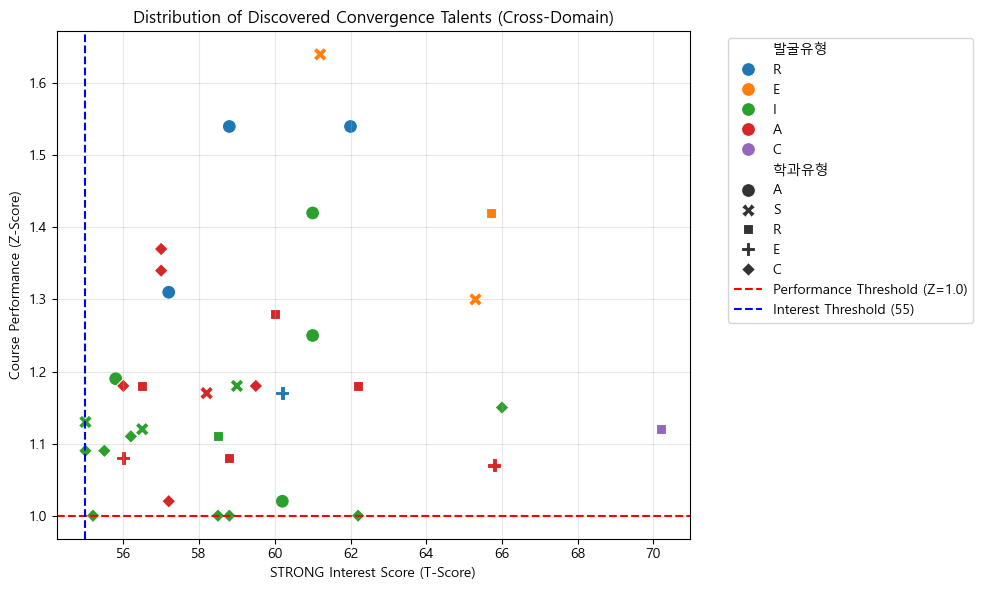

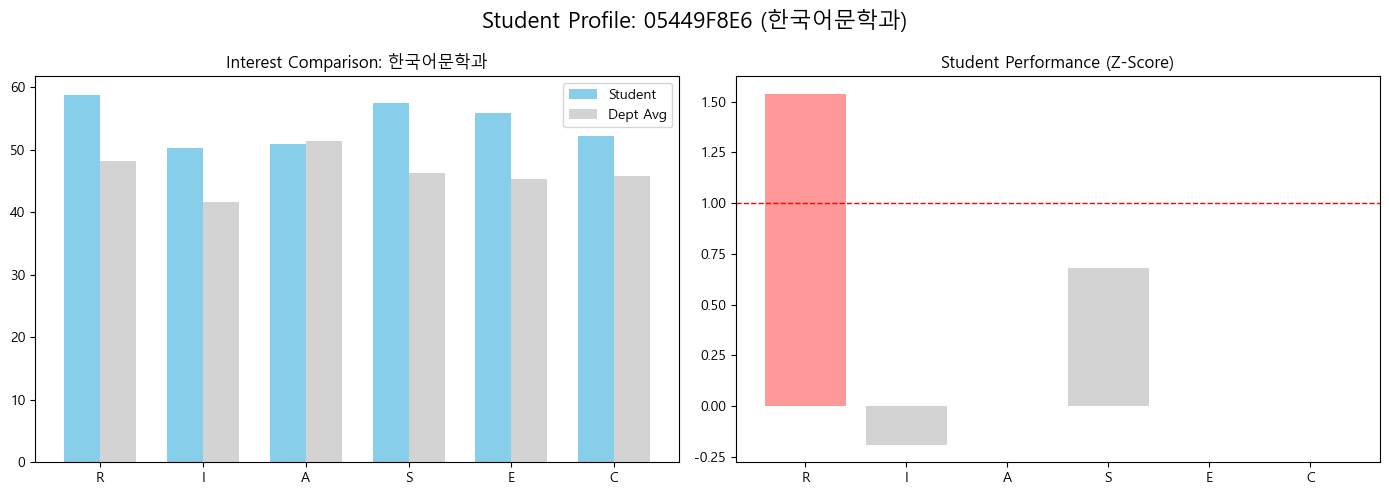

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# ---------------------------------------------------------
# 1. 데이터 로드 및 전처리 (분석 재실행)
# ---------------------------------------------------------
course_list_df = pd.read_excel('교양교과목록_최종.xlsx')
course_history_df = pd.read_excel('교양교과_수강정보_최종.xlsx')
strong_df = pd.read_excel('STRONG_최종.xlsx')

# 교과목 분류
manual_mapping = {'맛있는중국,멋있는중국': 'A', '에디톨로지인간의삶': 'I', '한끼의권리': 'S', '적성이이끄는삶': 'I', '정의란무엇인가': 'I', '삶과드라마': 'A', '여가': 'A'}
strong_keywords_code = {
    'R': ['골프', '축구', '풋살', '스킨스쿠버', '태권도', '탁구', '테니스', '댄스', '호신술', '건강', '재해', '안전', '환경', '생태', '자동차', '드론', '메이커', '3D', '기계', '스포츠', '신체', '농업', '배드민턴', '농생명', '탄소', '에너지', '우주', '지구', '한옥', '군사', '안보', '전투', '지휘', '야전'],
    'I': ['4차산업', 'AI', '인공지능', '데이터', '통계', '수학', '뇌과학', '역사', '철학', '사상', '비판적사고', '인문', '지역학', '과학', '탐구', '논리', '물리', '화학', '생물', '이해', '소프트웨어', 'SW', '코딩', '컴퓨팅', '컴퓨터', '알고리즘', 'ChatGPT', '개발자', '고전', '인간', '지성', '공존', '인구', '유전', '한의학', '한국사', '지리학', '세계대전', '사고와'],
    'A': ['디자인', '미술', '음악', '영화', '연극', '사진', '글쓰기', '문학', '스토리', '한국어', '영어', '중국어', '일본어', '회화', '예술', '창작', '언어', '표현', '드로잉', '영상', '문화', '한자', '오페라', '한문', '잉글리시', 'English', '콘텐츠', '시나리오', '서사', '패션', '와인', '작문'],
    'S': ['봉사', '멘토링', '인권', '복지', '나눔', '심리', '교육', '코칭', '부모', '기독교', '채플', '행복', '성경', '상담', 'AHA', '보살핌', '웰빙', '갈등', '치유', '놀이'],
    'E': ['창업', '스타트업', '경영', '마케팅', '기획', '리더십', '법', '토론', '스피치', '발표', '협상', '권력', '비즈니스', '경제', 'CEO', '리더', '진로', '행정', '범죄', '직무', '커리어', '기업', 'NCS', '취업', '프리젠테이션', '화술', '정치'],
    'C': ['엑셀', 'PPT', '문서', '회계', '세무', '재테크', '투자', '금융', '자산', '실무', '컴퓨터활용', '정보', '스마트', '부동산', '원가', '보고서', '파워포인트', '신용', '채권', '보험']
}
def classify_course_code(course_name):
    if pd.isna(course_name): return 'Unclassified'
    course_str = str(course_name).replace(" ", "")
    if course_name in manual_mapping: return manual_mapping[course_name]
    for code, keywords in strong_keywords_code.items():
        for keyword in keywords:
            if keyword in course_str: return code
    return 'Unclassified'
course_list_df['Course_Type'] = course_list_df['교과목명'].apply(classify_course_code)

# STRONG 데이터 전처리
new_columns = list(strong_df.columns)
bis_names = strong_df.iloc[1, 7:37].tolist()
for i, name in enumerate(bis_names): new_columns[7 + i] = name
strong_clean = strong_df.iloc[2:].copy()
strong_clean.columns = new_columns
target_cols = ['학번', '학부(과)', 'GOT 흥미유형'] + bis_names
strong_user = strong_clean[target_cols].copy()
def extract_got_code(val):
    if pd.isna(val): return np.nan
    if '(' in str(val): return str(val).split('(')[1].replace(')', '')
    return str(val)[0]
strong_user['GOT_Code'] = strong_user['GOT 흥미유형'].apply(extract_got_code)

# 학과 DNA 산출
dept_dna = strong_user.groupby('학부(과)')['GOT_Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()
dept_dna.columns = ['학부(과)', 'Dept_Dominant_Type']
strong_user = pd.merge(strong_user, dept_dna, on='학부(과)', how='left')

# 성적 Z-Score 산출
history_merged = pd.merge(course_history_df, course_list_df[['교과목명', 'Course_Type']], left_on='과목명', right_on='교과목명', how='left')
history_valid = history_merged[(history_merged['Course_Type'] != 'Unclassified') & (pd.to_numeric(history_merged['취득점수'], errors='coerce').notnull())].copy()
history_valid['취득점수'] = history_valid['취득점수'].astype(float)
course_stats = history_valid.groupby('과목명')['취득점수'].agg(['mean', 'std']).reset_index()
history_valid = pd.merge(history_valid, course_stats, on='과목명', how='left')
history_valid['z_score'] = (history_valid['취득점수'] - history_valid['mean']) / history_valid['std']
history_valid['z_score'] = history_valid['z_score'].fillna(0)
student_course_perf = history_valid.groupby(['학번', 'Course_Type'])['z_score'].mean().unstack(fill_value=-999).reset_index()

# 최종 데이터 병합 및 점수 산출
master_df = pd.merge(strong_user, student_course_perf, on='학번', how='inner')
bis_map = {
    'R': ['기계/건설', '컴퓨터/전자기기', '군사활동', '안전서비스', '자연/농업', '운동경기'],
    'I': ['과학', '연구조사', '의학', '수학'],
    'A': ['시각예술', '공연예술', '글쓰기/언론', '요리'],
    'S': ['상담/봉사', '교육', '인적 자원개발', '사회봉사', '종교/영성', '보건의료'],
    'E': ['마케팅/광고', '판매', '관리', '기업운영', '정치/대중연설', '법'],
    'C': ['사무관리', '세무/회계', '정보시스템', '금융/투자']
}
for code, cols in bis_map.items():
    valid_cols = [c for c in cols if c in strong_user.columns]
    if valid_cols:
        for c in valid_cols: master_df[c] = pd.to_numeric(master_df[c], errors='coerce')
        master_df[f'Interest_{code}'] = master_df[valid_cols].mean(axis=1)

# 인재 발굴
results = []
types = ['R', 'I', 'A', 'S', 'E', 'C']
for idx, row in master_df.iterrows():
    dept_type = row['Dept_Dominant_Type']
    for talent_type in types:
        if talent_type == dept_type: continue
        if talent_type in student_course_perf.columns:
            z_val = row[talent_type]
            interest_val = row.get(f'Interest_{talent_type}', 0)
            if z_val >= 1.0 and interest_val >= 55:
                results.append({
                    '학번': row['학번'],
                    '학과': row['학부(과)'],
                    '학과유형': dept_type,
                    '발굴유형': talent_type,
                    '성취도(Z)': round(z_val, 2),
                    '흥미도': round(interest_val, 1)
                })
result_df = pd.DataFrame(results)

# ---------------------------------------------------------
# 2. 시각화 (Visualization)
# ---------------------------------------------------------
# 2-1. 전체 분포 시각화 (Scatter Plot)
if not result_df.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=result_df, x='흥미도', y='성취도(Z)', hue='발굴유형', style='학과유형', s=100)
    plt.title('Distribution of Discovered Convergence Talents (Cross-Domain)')
    plt.axhline(1.0, color='red', linestyle='--', label='Performance Threshold (Z=1.0)')
    plt.axvline(55, color='blue', linestyle='--', label='Interest Threshold (55)')
    plt.xlabel('STRONG Interest Score (T-Score)')
    plt.ylabel('Course Performance (Z-Score)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 2-2. 개별 학생 심층 프로파일 시각화 (Bar Chart Comparison)
def plot_student_profile(student_id):
    student_data = master_df[master_df['학번'] == student_id].iloc[0]
    dept = student_data['학부(과)']
    
    # 학과 평균 데이터
    dept_peers = master_df[master_df['학부(과)'] == dept]
    
    types = ['R', 'I', 'A', 'S', 'E', 'C']
    student_interests = [student_data.get(f'Interest_{t}', 0) for t in types]
    dept_interests = [dept_peers[f'Interest_{t}'].mean() for t in types]
    
    # Z-Score 데이터
    student_perfs = []
    for t in types:
        val = student_data[t] if t in student_data and student_data[t] != -999 else 0
        student_perfs.append(val)
        
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Interest
    x = np.arange(len(types))
    width = 0.35
    ax[0].bar(x - width/2, student_interests, width, label='Student', color='skyblue')
    ax[0].bar(x + width/2, dept_interests, width, label='Dept Avg', color='lightgrey')
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(types)
    ax[0].set_title(f'Interest Comparison: {dept}')
    ax[0].legend()
    
    # Performance
    ax[1].bar(x, student_perfs, color=['#ff9999' if v >= 1.0 else 'lightgrey' for v in student_perfs])
    ax[1].axhline(1.0, color='red', linestyle='--', linewidth=1)
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(types)
    ax[1].set_title(f'Student Performance (Z-Score)')
    
    plt.suptitle(f'Student Profile: {student_id} ({dept})', fontsize=16)
    plt.tight_layout()
    plt.show()

# 샘플 학생 시각화 (첫 번째 발굴 학생)
if not result_df.empty:
    target_student = result_df.iloc[0]['학번']
    plot_student_profile(target_student)

c:\Users\brigh\Documents\GitHub\warehouse\.venv\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde
C:\Users\brigh\AppData\Local\Temp\ipykernel_29196\1750333474.py:179: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


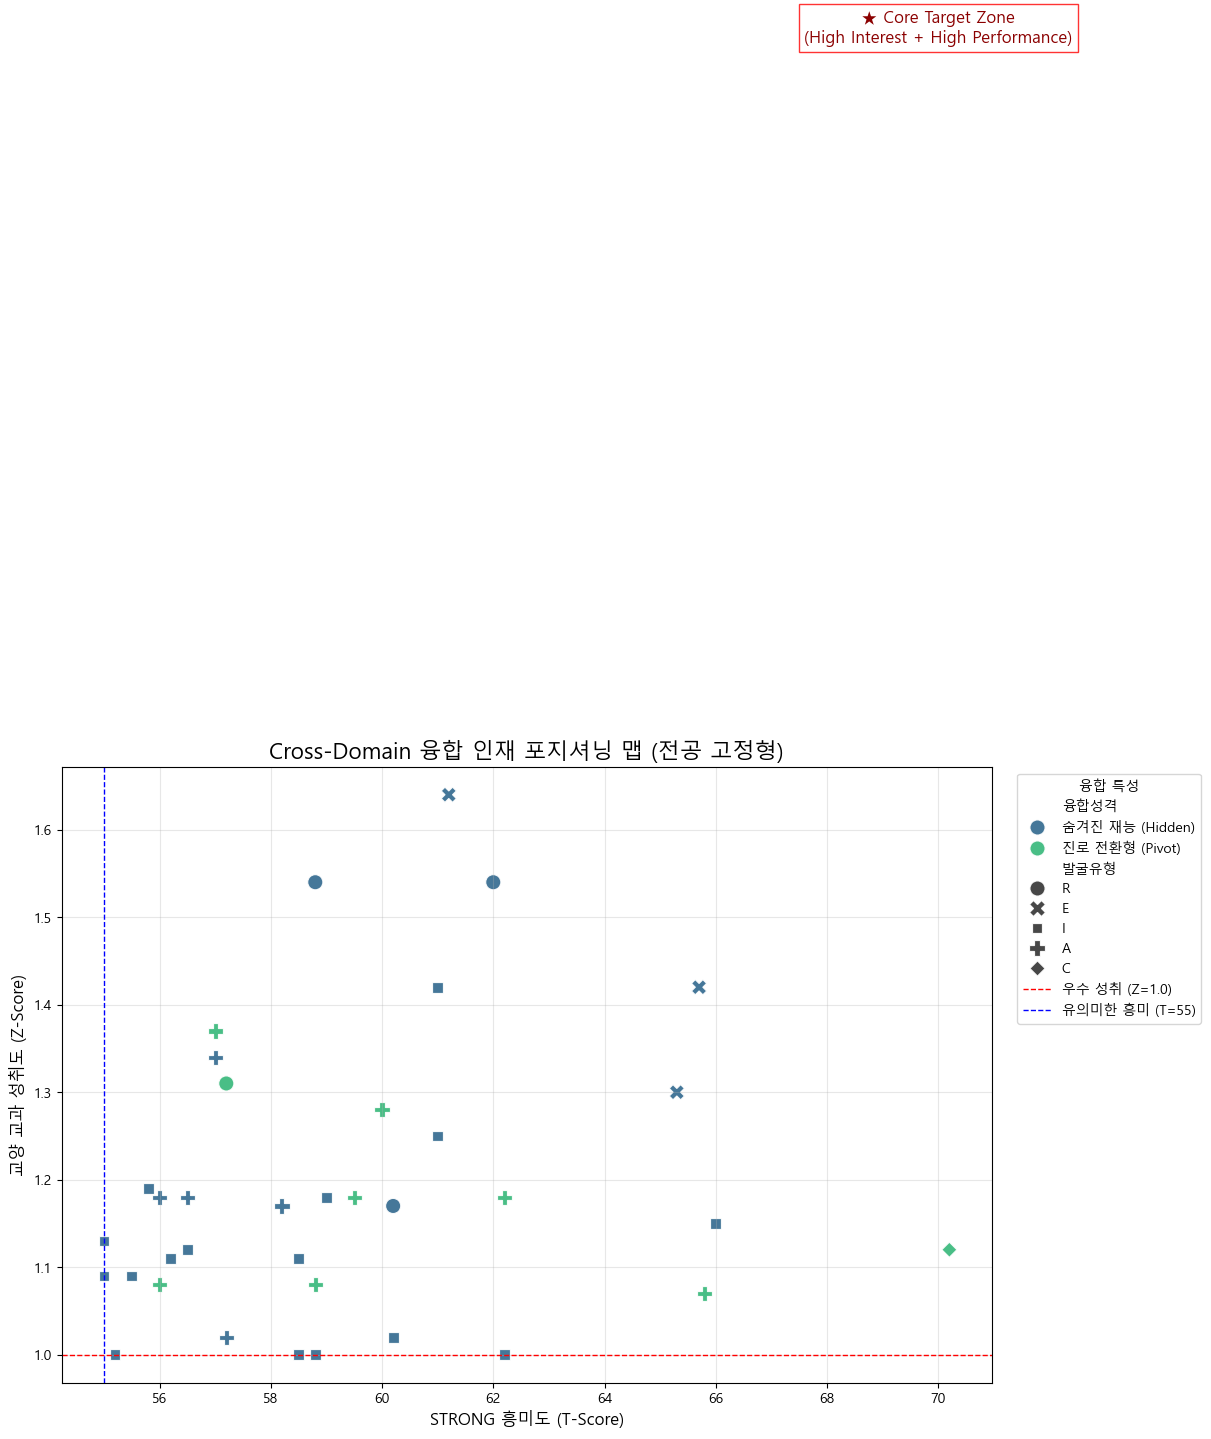

          학번       학과 전공유형 발굴유형             융합성격  성취도(Z)   흥미도
0  05449F8E6   한국어문학과    A    R  숨겨진 재능 (Hidden)    1.54  58.8
1  05462F6C3  중등특수교육과    S    E  숨겨진 재능 (Hidden)    1.64  61.2
2  0546CCAD3    국어교육과    S    E  숨겨진 재능 (Hidden)    1.30  65.3
3  0546CE56E    한문교육과    S    I  숨겨진 재능 (Hidden)    1.12  56.5
4  0546CE56E    한문교육과    S    A  숨겨진 재능 (Hidden)    1.17  58.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 환경 가정 'Malgun Gothic', Mac은 'AppleGothic' 등으로 변경)
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

# ---------------------------------------------------------
# 1. 데이터 로드
# ---------------------------------------------------------
course_list_df = pd.read_excel('교양교과목록_최종.xlsx')
course_history_df = pd.read_excel('교양교과_수강정보_최종.xlsx')
strong_df = pd.read_excel('STRONG_최종.xlsx')

# ---------------------------------------------------------
# 2. [전처리 Step 1] 교과목 DNA 태깅 (STRONG 기준)
# ---------------------------------------------------------
manual_mapping = {'맛있는중국,멋있는중국': 'A', '에디톨로지인간의삶': 'I', '한끼의권리': 'S', '적성이이끄는삶': 'I', '정의란무엇인가': 'I', '삶과드라마': 'A', '여가': 'A'}
strong_keywords_code = {
    'R': ['골프', '축구', '풋살', '스킨스쿠버', '태권도', '탁구', '테니스', '댄스', '호신술', '건강', '재해', '안전', '환경', '생태', '자동차', '드론', '메이커', '3D', '기계', '스포츠', '신체', '농업', '배드민턴', '농생명', '탄소', '에너지', '우주', '지구', '한옥', '군사', '안보', '전투', '지휘', '야전'],
    'I': ['4차산업', 'AI', '인공지능', '데이터', '통계', '수학', '뇌과학', '역사', '철학', '사상', '비판적사고', '인문', '지역학', '과학', '탐구', '논리', '물리', '화학', '생물', '이해', '소프트웨어', 'SW', '코딩', '컴퓨팅', '컴퓨터', '알고리즘', 'ChatGPT', '개발자', '고전', '인간', '지성', '공존', '인구', '유전', '한의학', '한국사', '지리학', '세계대전', '사고와'],
    'A': ['디자인', '미술', '음악', '영화', '연극', '사진', '글쓰기', '문학', '스토리', '한국어', '영어', '중국어', '일본어', '회화', '예술', '창작', '언어', '표현', '드로잉', '영상', '문화', '한자', '오페라', '한문', '잉글리시', 'English', '콘텐츠', '시나리오', '서사', '패션', '와인', '작문'],
    'S': ['봉사', '멘토링', '인권', '복지', '나눔', '심리', '교육', '코칭', '부모', '기독교', '채플', '행복', '성경', '상담', 'AHA', '보살핌', '웰빙', '갈등', '치유', '놀이'],
    'E': ['창업', '스타트업', '경영', '마케팅', '기획', '리더십', '법', '토론', '스피치', '발표', '협상', '권력', '비즈니스', '경제', 'CEO', '리더', '진로', '행정', '범죄', '직무', '커리어', '기업', 'NCS', '취업', '프리젠테이션', '화술', '정치'],
    'C': ['엑셀', 'PPT', '문서', '회계', '세무', '재테크', '투자', '금융', '자산', '실무', '컴퓨터활용', '정보', '스마트', '부동산', '원가', '보고서', '파워포인트', '신용', '채권', '보험']
}

def classify_course_code(course_name):
    if pd.isna(course_name): return 'Unclassified'
    course_str = str(course_name).replace(" ", "")
    if course_name in manual_mapping: return manual_mapping[course_name]
    for code, keywords in strong_keywords_code.items():
        for keyword in keywords:
            if keyword in course_str: return code
    return 'Unclassified'

course_list_df['Course_Type'] = course_list_df['교과목명'].apply(classify_course_code)

# ---------------------------------------------------------
# 3. [전처리 Step 2] STRONG 데이터 정제 및 1~3순위 추출
# ---------------------------------------------------------
new_columns = list(strong_df.columns)
bis_names = strong_df.iloc[1, 7:37].tolist()
for i, name in enumerate(bis_names): new_columns[7 + i] = name
strong_clean = strong_df.iloc[2:].copy()
strong_clean.columns = new_columns
target_cols = ['학번', '학부(과)', 'GOT 흥미유형'] + bis_names
strong_user = strong_clean[target_cols].copy()

def extract_got_codes_list(val):
    if pd.isna(val): return []
    codes = []
    parts = str(val).split(',')
    for part in parts:
        part = part.strip()
        if '(' in part:
            code = part.split('(')[1].replace(')', '')
        else:
            code = part[0]
        codes.append(code)
    return codes

strong_user['GOT_List'] = strong_user['GOT 흥미유형'].apply(extract_got_codes_list)
strong_user['GOT_Main'] = strong_user['GOT_List'].apply(lambda x: x[0] if len(x) > 0 else np.nan)

# ---------------------------------------------------------
# 4. [전처리 Step 3] 학과 DNA 정의 (전공 고정값 설정)
# ---------------------------------------------------------
dept_dna = strong_user.groupby('학부(과)')['GOT_Main'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()
dept_dna.columns = ['학부(과)', 'Dept_Dominant_Type']
strong_user = pd.merge(strong_user, dept_dna, on='학부(과)', how='left')

# ---------------------------------------------------------
# 5. [전처리 Step 4] 성적 거품 제거 (Z-Score 산출)
# ---------------------------------------------------------
history_merged = pd.merge(course_history_df, course_list_df[['교과목명', 'Course_Type']], left_on='과목명', right_on='교과목명', how='left')
history_valid = history_merged[(history_merged['Course_Type'] != 'Unclassified') & (pd.to_numeric(history_merged['취득점수'], errors='coerce').notnull())].copy()
history_valid['취득점수'] = history_valid['취득점수'].astype(float)

course_stats = history_valid.groupby('과목명')['취득점수'].agg(['mean', 'std']).reset_index()
history_valid = pd.merge(history_valid, course_stats, on='과목명', how='left')
history_valid['z_score'] = (history_valid['취득점수'] - history_valid['mean']) / history_valid['std']
history_valid['z_score'] = history_valid['z_score'].fillna(0)

student_course_perf = history_valid.groupby(['학번', 'Course_Type'])['z_score'].mean().unstack(fill_value=-999).reset_index()

# ---------------------------------------------------------
# 6. [분석 및 병합] 최종 데이터셋 생성
# ---------------------------------------------------------
master_df = pd.merge(strong_user, student_course_perf, on='학번', how='inner')

bis_map = {
    'R': ['기계/건설', '컴퓨터/전자기기', '군사활동', '안전서비스', '자연/농업', '운동경기'],
    'I': ['과학', '연구조사', '의학', '수학'],
    'A': ['시각예술', '공연예술', '글쓰기/언론', '요리'],
    'S': ['상담/봉사', '교육', '인적 자원개발', '사회봉사', '종교/영성', '보건의료'],
    'E': ['마케팅/광고', '판매', '관리', '기업운영', '정치/대중연설', '법'],
    'C': ['사무관리', '세무/회계', '정보시스템', '금융/투자']
}
for code, cols in bis_map.items():
    valid_cols = [c for c in cols if c in strong_user.columns]
    if valid_cols:
        for c in valid_cols: master_df[c] = pd.to_numeric(master_df[c], errors='coerce')
        master_df[f'Interest_{code}'] = master_df[valid_cols].mean(axis=1)

# ---------------------------------------------------------
# 7. [인재 발굴 로직] 2순위까지 고려한 Cross-Domain 탐색
# ---------------------------------------------------------
results = []
types = ['R', 'I', 'A', 'S', 'E', 'C']

for idx, row in master_df.iterrows():
    dept_type = row['Dept_Dominant_Type']
    got_list = row['GOT_List']
    
    for talent_type in types:
        # [Logic] 1. 전공은 이미 갖췄다고 가정 (분석 제외)
        if talent_type == dept_type: continue
        
        if talent_type in student_course_perf.columns:
            z_val = row[talent_type]
            interest_val = row.get(f'Interest_{talent_type}', 0)
            
            # [Logic] 2. Z-Score 1.0 이상 (상위 15%) & 흥미 55점 이상
            if z_val >= 1.0 and interest_val >= 55:
                
                # [Logic] 3. 융합 성격 규명
                fusion_category = ""
                rank = -1
                if talent_type in got_list:
                    rank = got_list.index(talent_type) + 1
                    if rank == 1:
                        fusion_category = "진로 전환형 (Pivot)"
                    else:
                        fusion_category = "역량 확장형 (Expansion)"
                else:
                    fusion_category = "숨겨진 재능 (Hidden)"
                    rank = 99
                
                # 여기서 컬럼명을 '발굴유형'으로 통일 (오류 수정 포인트)
                results.append({
                    '학번': row['학번'],
                    '학과': row['학부(과)'],
                    '전공유형': dept_type,
                    '발굴유형': talent_type, 
                    '융합성격': fusion_category,
                    '성취도(Z)': round(z_val, 2),
                    '흥미도': round(interest_val, 1)
                })

result_df = pd.DataFrame(results)

# ---------------------------------------------------------
# 8. [시각화] 4사분면 매트릭스 (수정됨)
# ---------------------------------------------------------
if not result_df.empty:
    plt.figure(figsize=(12, 8))
    
    # 발굴된 학생 산점도 (수정된 컬럼명 '발굴유형' 사용)
    sns.scatterplot(data=result_df, x='흥미도', y='성취도(Z)', 
                    hue='융합성격', style='발굴유형', s=120, alpha=0.9, palette='viridis')
    
    # 기준선 (Threshold)
    plt.axhline(1.0, color='red', linestyle='--', linewidth=1, label='우수 성취 (Z=1.0)')
    plt.axvline(55, color='blue', linestyle='--', linewidth=1, label='유의미한 흥미 (T=55)')
    
    # 1사분면 강조 텍스트
    plt.text(70, 2.5, '★ Core Target Zone\n(High Interest + High Performance)', 
             fontsize=12, color='darkred', ha='center', 
             bbox=dict(facecolor='white', edgecolor='red', alpha=0.8))
    
    plt.title('Cross-Domain 융합 인재 포지셔닝 맵 (전공 고정형)', fontsize=16)
    plt.xlabel('STRONG 흥미도 (T-Score)', fontsize=12)
    plt.ylabel('교양 교과 성취도 (Z-Score)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='융합 특성')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(result_df.head())
else:
    print("조건을 만족하는 데이터가 없습니다.")